In [3]:
#importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

# Question 1

In [4]:
#importing the needed data
deliveries = [6,7,6,7,7,6,11,4,8,6,6,12,2,8,12,5,7,8,6,11,6,8,9,11,5,9,8,9,8,12]

In [5]:
# part a

#Step 1: sort the list numerically in ascending order
deliveries.sort()

#Step 2: set bin depth and find numer of bins
bin_depth = 10
num_bins = math.ceil(len(deliveries)/bin_depth)

#Step 3: make depth bins
depth_bins = []         #creating arrays for the bins
smoothed_depth_bins = []

for i in range(num_bins):
    start = i * bin_depth
    end = start + bin_depth
    bin_values = deliveries[start:end]

    #record bins with depth 10 before smoothing
    depth_bins.append(bin_values)

#Step 4: calculate the means of the bins
    bin_mean = sum(bin_values) / len(bin_values)

    # Create smoothed bin (all values replaced by mean)
    smoothed_depth_bin = [bin_mean] * len(bin_values)
    smoothed_depth_bins.append(smoothed_depth_bin)

# Step 5: print results
print(f"Depth bins without smoothing by means: \n{depth_bins[0]}\n{depth_bins[1]}\n{depth_bins[2]}\n")
print(f"Smoothed mean bins: \n{smoothed_depth_bins[0]}\n{smoothed_depth_bins[1]}\n{smoothed_depth_bins[2]}")

Depth bins without smoothing by means: 
[2, 4, 5, 5, 6, 6, 6, 6, 6, 6]
[6, 7, 7, 7, 7, 8, 8, 8, 8, 8]
[8, 9, 9, 9, 11, 11, 11, 12, 12, 12]

Smoothed mean bins: 
[5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2]
[7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4]
[10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4]


In [6]:
# part b

#deliveries has already been sorted in numerical ascending order

#Step 1: dividing the length of deliveries by three to get the width of the interval
data_range = max(deliveries) - min(deliveries)
interval = int(math.ceil(data_range/3))
min_data = min(deliveries)
number_bins = 3
k = 0       #variable that will keep track of where we are in deliveries

#Step 2: make width bins
width_bins = []         #creating arrays for the bins
smoothed_width_bins = []

for i in range(number_bins):
    end = min_data + i * interval + interval

    current_bin = []

    #add values in the bin range to the current bin
    while k < len(deliveries) and deliveries[k] < end:
        current_bin.append(deliveries[k])
        k += 1

    #add the current bin to the width bins
    width_bins.append(current_bin)

#Step 3: make smoothed width bins with medians
    #get median
    median = float(np.median(current_bin))

    #make and add the smoothed bins to the smoothed_width_bins
    smoothed_bin = [median] * len(current_bin)
    smoothed_width_bins.append(smoothed_bin)

# Step 4: print Results
print(f"Width bins without smoothing by median: \n{width_bins[0]}\n{width_bins[1]}\n{width_bins[2]}\n")
print(f"Smoothed median bins: \n{smoothed_width_bins[0]}\n{smoothed_width_bins[1]}\n{smoothed_width_bins[2]}")
            

Width bins without smoothing by median: 
[2, 4, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9]
[11, 11, 11, 12, 12, 12]

Smoothed median bins: 
[4.5, 4.5, 4.5, 4.5]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[11.5, 11.5, 11.5, 11.5, 11.5, 11.5]


## part c

For the given data, I would prefer to use smoothing by bin medians. This is because binning by width instead of depth is able to show the grouping of the data in the length of the bins. With this method you can see that there are more data points in the middle of the dataset than towards the higer and lower values giving you a better understanding of the dataset as a whole. The only data that the bins created with smoothing by bin means with equal depths shows is the means because each bin is the same length.

In [7]:
# part d

#calculating the min-max normalization for 5
mm_transformed_5 = (5-min(deliveries))/(max(deliveries)-min(deliveries))

print (f"The transformed value of 5 after applying min-max normalization is {mm_transformed_5}")

The transformed value of 5 after applying min-max normalization is 0.3


In [8]:
#part e

#calculating the mean and standard deviation of deliveries data
mean = np.mean(deliveries)
std = np.std(deliveries)

#calculating the z-score normalization of 5
z_transformed_5 = (5-mean)/std

print (f"The transformed value of 5 after applying z-score normalization is {z_transformed_5}")

The transformed value of 5 after applying z-score normalization is -1.0988845115895123


## part f

For the given data, I would rather use max-min normalization. Since the data has a small range of values, the max-min score is easily interpreted since it is on a scale of 0 to 1. When looking at z-score it is harder to interpret the actual value of a point because it is centered around the mean of the data without a known range. When comparing data points min-max normalization scores would be easier to compare than z-score normalization scores because the min-max values are on a known range of values making it easier to interpret the differences between the two points, and the z-score values would only be useful to tell if the values were above or below the mean.

# Question 2

In [9]:
# This contains some functions written by the authors of the textbook (ISLP)

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [10]:
#loading the Bikeshare data

from ISLP import load_data
Bikeshare = load_data('Bikeshare')
Bikeshare

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [11]:
# part a

#build a linear model where temp predicts bikers
x = sm.add_constant(Bikeshare["temp"])
y = Bikeshare["bikers"]
model_temp = sm.OLS(y,x)
results_temp = model_temp.fit()
summarize(results_temp)

,coef,std err,t,P>|t|
const,-5.3745,3.423,-1.570,0.116
temp,305.0060,6.488,47.008,0.000


## part b

We can deduce that there is a significant association between the predictor and the response because of the extremely low p-value. The p-value equals 0.0 which is less than 0.05 meaning that the relationship between temp and bikers is statistically significant and it is unlikely that the data is correlated by chance.

In [12]:
#part c

#calculate the r-squared value
print('R^2 of the temp and bikers data:',results_temp.rsquared)

R^2 of the temp and bikers data: 0.20361080146793875


The relationship between the predictor and the response is moderately strong. The r-squared value is 0.63 which means that 63% of the variation in bikers is explained by temp. 63% is a significant portion of the variation.

## part d

The relationship between temp and bikers is positive because the coeficient of temperature is positive with a value of 305. This means that for every degree in temperature that increases, the number of bikers also increases.

In [13]:
#part e

#use mx + b to predict
biker_pred = 305 * (min(Bikeshare["temp"])) - 5.37

print(f"The predicted number of bikers on a day that averages the minimum temp is {biker_pred}")

The predicted number of bikers on a day that averages the minimum temp is 0.7300000000000004


## part f

It could be inappropriate to use this model to predict the number of bikers on the coldest day becasue there are other factors, like windspeed, that go into how many bikers there will be. Since we have not checked if other models are more or less accurate, we can not be sure that a simple linear model represents the data well.

/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_56202/737242797.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_temp.params[0],
/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_56202/737242797.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_temp.params[1],
/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_56202/737242797.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  resu

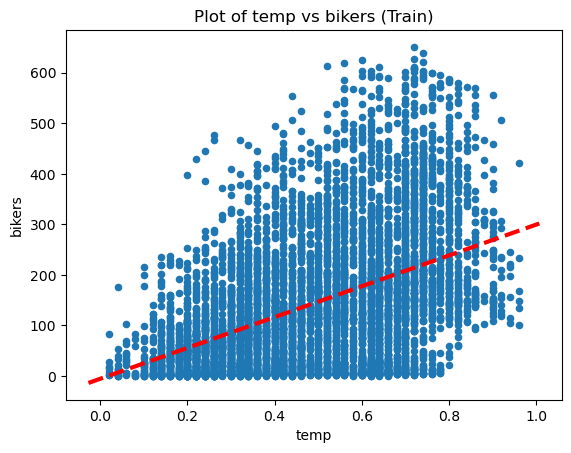

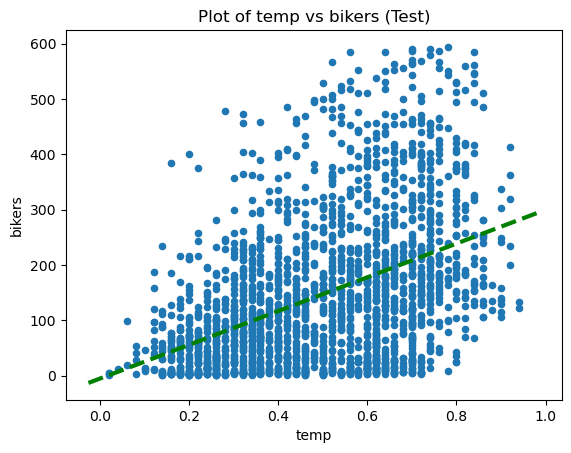

In [14]:
# part g

#define a function to draw a line given coefficients [credit to Hastie & Tibshirani]
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

#create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25,
                                                    shuffle=True) 
Train = pd.merge_ordered(X_train,y_train,left_on=X_train.index,right_on=y_train.index).drop(columns=['key_0'])
Test = pd.merge_ordered(X_test,y_test,left_on=X_test.index,right_on=y_test.index).drop(columns=['key_0'])

##plot on training set
ax = Train.plot.scatter("temp", "bikers")
ax.set_title("Plot of temp vs bikers (Train)")
abline(ax,
       results_temp.params[0],
       results_temp.params[1],
       'r--',
       linewidth=3)

#plot on test set
ax = Test.plot.scatter("temp", "bikers")
ax.set_title("Plot of temp vs bikers (Test)")
abline(ax,
       results_temp.params[0],
       results_temp.params[1],
       'g--',
       linewidth=3)

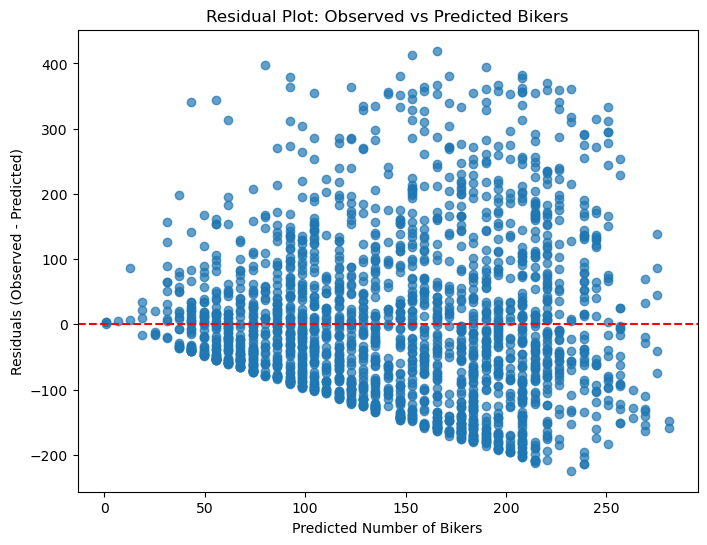

In [27]:
# part h

#create helper functions for computing the prediction functin that help with prediction
def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

predictions_temp_test = predict(X_test[['const', 'temp']], results_temp)

#calculating residuals
residuals = y_test - predictions_temp_test

#making the resiual plot
plt.figure(figsize=(8,6))
plt.scatter(predictions_temp_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Number of Bikers')
plt.ylabel('Residuals (Observed - Predicted)')
plt.title('Residual Plot: Observed vs Predicted Bikers')
plt.show()

# Question 3

In [28]:
#convert hr to numeric

Bikeshare['hr'] = pd.to_numeric(Bikeshare['hr'], errors='coerce')

In [29]:
# part a

# Select only numeric columns (this automatically includes 'hr' if numeric)
numeric_cols = Bikeshare.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix = Bikeshare[numeric_cols].corr()

# Display the matrix
print(correlation_matrix)

              season       day        hr   holiday   weekday  workingday  \
season      1.000000  0.825218 -0.012179 -0.001116 -0.013639    0.013763   
day         0.825218  1.000000 -0.011560  0.030972  0.010990    0.003277   
hr         -0.012179 -0.011560  1.000000 -0.000929 -0.005618    0.003792   
holiday    -0.001116  0.030972 -0.000929  1.000000 -0.076324   -0.247934   
weekday    -0.013639  0.010990 -0.005618 -0.076324  1.000000    0.018572   
workingday  0.013763  0.003277  0.003792 -0.247934  0.018572    1.000000   
temp        0.343535  0.261316  0.120548 -0.020059 -0.038969    0.053405   
atemp       0.351910  0.273091  0.116382 -0.026915 -0.042439    0.052551   
hum         0.191793  0.189453 -0.251188 -0.022895 -0.051307    0.025305   
windspeed  -0.154735 -0.154169  0.125153  0.000502  0.039586    0.010509   
casual      0.141894  0.090982  0.303720  0.052906 -0.013475   -0.324750   
registered  0.220666  0.185044  0.390313 -0.046779 -0.000500    0.129540   
bikers      

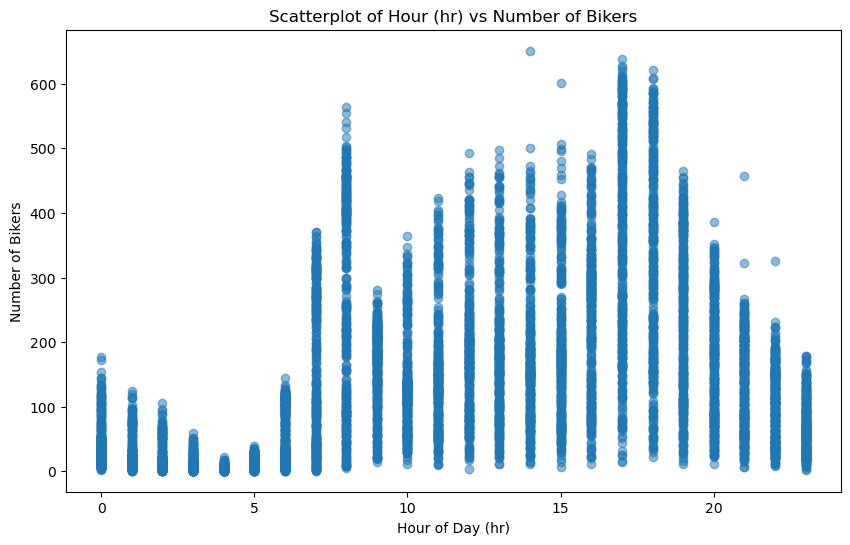

In [30]:
# part b

#mking a scatterplot of hours bv bikes
plt.figure(figsize=(10, 6))
plt.scatter(Bikeshare['hr'], Bikeshare['bikers'], alpha=0.5)
plt.xlabel('Hour of Day (hr)')
plt.ylabel('Number of Bikers')
plt.title('Scatterplot of Hour (hr) vs Number of Bikers')
plt.show()

In [31]:
# part c

# Prepare predictor X and response y
X = Bikeshare[['hr']]
X = sm.add_constant(X)  # Adds intercept term

y = Bikeshare['bikers']

# Fit the model
model_multi_temp = sm.OLS(y, X).fit()

# Print summary
print(model_multi_temp.summary())

# Calculate predictions
predictions = model_multi_temp.predict(X)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y - predictions) ** 2)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1721.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:08:22   Log-Likelihood:                -53810.
No. Observations:                8645   AIC:                         1.076e+05
Df Residuals:                    8643   BIC:                         1.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4482      2.564     20.453      0.0

In [32]:
#part d

# Create hr squared term
Bikeshare['hr2'] = Bikeshare['hr'] ** 2

# Prepare predictors including intercept
X_quad = Bikeshare[['hr', 'hr2']]
X_quad = sm.add_constant(X_quad)

# Response variable
y = Bikeshare['bikers']

# Fit the quadratic model
model_quad = sm.OLS(y, X_quad).fit()

# Print summary
print(model_quad.summary())

# Calculate predictions
predictions_quad = model_quad.predict(X_quad)

# Calculate Mean Squared Error (MSE)
mse_quad = np.mean((y - predictions_quad) ** 2)
print(f"\nMean Squared Error (MSE) for quadratic model: {mse_quad:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1898.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:12:43   Log-Likelihood:                -53021.
No. Observations:                8645   AIC:                         1.060e+05
Df Residuals:                    8642   BIC:                         1.061e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.4378      3.336    -13.918      0.0

In [33]:
#part e

# Create interaction term hr * workingday
Bikeshare['hr_workingday'] = Bikeshare['hr'] * Bikeshare['workingday']

# Prepare predictors with intercept
X_interact = Bikeshare[['hr', 'hr2', 'workingday', 'hr_workingday']]
X_interact = sm.add_constant(X_interact)

# Response variable
y = Bikeshare['bikers']

# Fit the model with interaction
model_interact = sm.OLS(y, X_interact).fit()

# Print summary
print(model_interact.summary())

# Calculate predictions
predictions_interact = model_interact.predict(X_interact)

# Calculate Mean Squared Error (MSE)
mse_interact = np.mean((y - predictions_interact) ** 2)
print(f"\nMean Squared Error (MSE) with interaction: {mse_interact:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     950.8
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:14:51   Log-Likelihood:                -53018.
No. Observations:                8645   AIC:                         1.060e+05
Df Residuals:                    8640   BIC:                         1.061e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -41.9017      4.777     -8.771

In [34]:
#part f

# Define predictor variables and add intercept
X_full = Bikeshare[['hr', 'hr2', 'workingday', 'hr_workingday', 'temp']]
X_full = sm.add_constant(X_full)

# Define response variable
y = Bikeshare['bikers']

# Fit the model
model_full = sm.OLS(y, X_full).fit()

# Print model summary
print(model_full.summary())

# Make predictions
predictions_full = model_full.predict(X_full)

# Compute Mean Squared Error
mse_full = np.mean((y - predictions_full) ** 2)
print(f"\nMean Squared Error (MSE) with temp added: {mse_full:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1362.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:21:53   Log-Likelihood:                -52083.
No. Observations:                8645   AIC:                         1.042e+05
Df Residuals:                    8639   BIC:                         1.042e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -139.8046      4.793    -29.170

## part g

As I add more predictors to the trining model, MSE will decrease until I reach a stopping criteria. We are using a forward selection method of choosing variables because we are adding one variable at a time and analyzing the performance of the model at each stop. If I were to add many more variables to my model the MSE value would probably be higher than the one calculated in part f, since it appears we had reached the stopping criteria in part e (which was the last time the MSE value decreased between models).

In [35]:
# Define predictors and add intercept
X_final = Bikeshare[['hr', 'hr2', 'workingday', 'hr_workingday', 'temp', 'windspeed', 'registered']]
X_final = sm.add_constant(X_final)

# Define response variable
y = Bikeshare['bikers']

# Fit the model
model_final = sm.OLS(y, X_final).fit()

# Print model summary
print(model_final.summary())

# Make predictions
predictions_final = model_final.predict(X_final)

# Compute Mean Squared Error (MSE)
mse_final = np.mean((y - predictions_final) ** 2)
print(f"\nMean Squared Error (MSE) with added predictors: {mse_final:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 3.264e+04
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:35:58   Log-Likelihood:                -40277.
No. Observations:                8645   AIC:                         8.057e+04
Df Residuals:                    8637   BIC:                         8.063e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -28.4787      1.300    -21.909

## part h

I would expect the model created in part e, with 'hr', 'hr2', 'workingday', and 'hr_workingday' as variables, to be the best performing model of the ones we created because it has the lowest MSE value. The MSE value measures the amount of error in statistical models, meaning that the best performing models have lower MSE values. Since we are aware that the model in part e has the lowest MSE value of the ones calculated, we know that the model's predictions are closer to the actual values, signifying better accuracy.